## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset and display a sample
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Data loaded successfully. Sample of 5 rows:")
    display(df.sample(5))
except FileNotFoundError:
    print("Error: The file '../data/raw/data.csv' was not found.")
    df = None # Set df to None if loading failed

Data loaded successfully. Sample of 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
30911,TransactionId_113374,BatchId_116024,AccountId_318,SubscriptionId_3087,CustomerId_647,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-17T17:50:13Z,2,0
39544,TransactionId_81129,BatchId_106112,AccountId_3149,SubscriptionId_1347,CustomerId_3575,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,5000.0,5000,2018-12-24T21:27:17Z,2,0
76389,TransactionId_91668,BatchId_21610,AccountId_4841,SubscriptionId_3829,CustomerId_3390,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.0,100,2019-01-28T14:57:29Z,2,0
72809,TransactionId_123126,BatchId_65201,AccountId_2124,SubscriptionId_4735,CustomerId_2529,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2019-01-25T17:00:32Z,2,0
4440,TransactionId_21827,BatchId_107657,AccountId_2673,SubscriptionId_1664,CustomerId_3092,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2018-11-20T10:05:19Z,2,0


## 2. Initial Data Structure and Quality Check

In [3]:
if df is not None:
    # Print basic DataFrame information (df.info() functionality)
    print("\n--- df.info() output ---")
    df.info()
    
    # Display basic structure (shape, dtypes, missing values)
    print("\n📌 Number of Rows and Columns:")
    print(df.shape)
    
    print("\n📌 Data Types:")
    print(df.dtypes)
    
    print("\n📌 Summary of Missing Values (Total Nulls per Column):")
    print(df.isnull().sum())
else:
    print("Cannot proceed without data.")


--- df.info() output ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64 

## 3. Data Type Conversion

In [4]:
if df is not None:
    # Parse the 'TransactionStartTime' column to UTC-aware datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True)
    
    # Check the changed datatype
    print("New Data Type for TransactionStartTime:")
    display(df['TransactionStartTime'].dtype)
else:
    print("Cannot proceed without data.")

New Data Type for TransactionStartTime:


datetime64[ns, UTC]

## 4. Descriptive Statistics and Distribution Measures

In [5]:
if df is not None:
    # Select only numeric columns for statistical analysis
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # 1. Descriptive Statistics (Central Tendency & Dispersion)
    print("📌 Descriptive Statistics (Transposed for readability):")
    display(numeric_df.describe().T)
    
    # 2. Skewness (measures asymmetry of the distribution)
    print("\n📌 Skewness (Distribution Asymmetry):")
    display(numeric_df.skew())
    
    # 3. Kurtosis (measures tail heaviness)
    print("\n📌 Kurtosis (Tail Heaviness):")
    display(numeric_df.kurtosis())
else:
    print("Cannot proceed without data.")

📌 Descriptive Statistics (Transposed for readability):


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0



📌 Skewness (Distribution Asymmetry):


CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


📌 Kurtosis (Tail Heaviness):


CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64

## 5. Correlation Analysis of Numerical Features

📌 Correlation Matrix:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


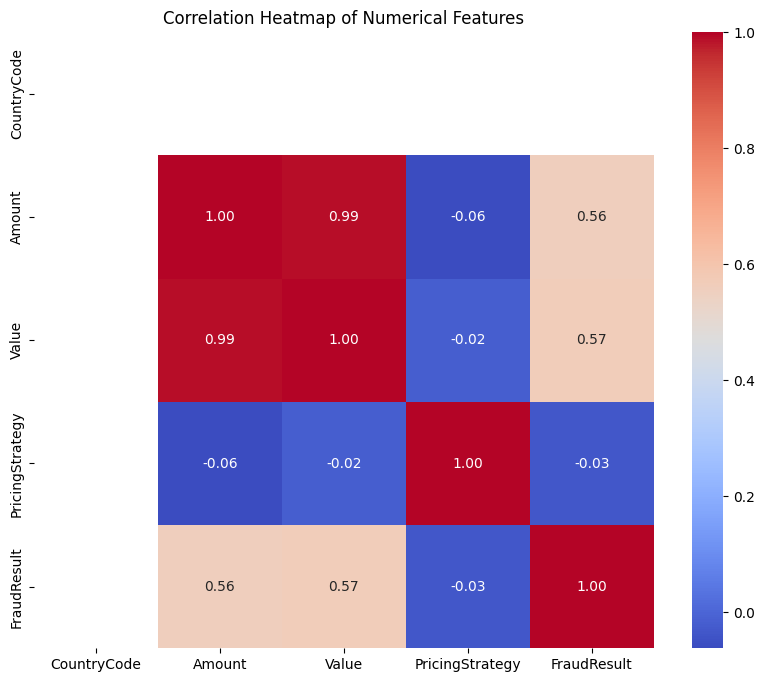


📌 Highest Positive & Negative Correlations With FraudResult:


,Correlation
FraudResult,1.000000
Value,0.566739
Amount,0.557370
PricingStrategy,-0.033821
CountryCode,NaN


In [6]:
if df is not None:
    # Select numerical columns only (excluding datetime)
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Display correlation matrix
    print("📌 Correlation Matrix:")
    display(corr_matrix)
    
    # Heatmap visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show() # Equivalent to the output image in the original notebook
    
    # Show top correlations with FraudResult
    if "FraudResult" in numeric_df.columns:
        print("\n📌 Highest Positive & Negative Correlations With FraudResult:")
        display(
            corr_matrix["FraudResult"]
            .sort_values(ascending=False)
            .to_frame("Correlation")
        )
else:
    print("Cannot proceed without data.")

## 6. Outlier Detection (Z-Score Method)

In [7]:
if df is not None:
    # Identify continuous numeric columns based on original notebook's logic
    continuous_cols = ['Amount', 'Value'] 

    # Compute Z-scores
    z_scores = stats.zscore(df[continuous_cols], nan_policy='omit')

    # Convert Z-scores to DataFrame with original index
    z_scores_df = pd.DataFrame(z_scores, columns=continuous_cols, index=df.index)

    # Create boolean mask for outliers (absolute Z-score > 3)
    outlier_mask = (z_scores_df.abs() > 3).any(axis=1)

    # Filter the original DataFrame to show outliers
    outliers = df[outlier_mask]
    
    print(f"📌 Outliers Detected (Z-score > 3): {len(outliers)} rows")
    display(outliers)
else:
    print("Cannot proceed without data.")

📌 Outliers Detected (Z-score > 3): 269 rows


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15 08:04:51+00:00,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15 08:20:09+00:00,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15 08:31:57+00:00,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17 09:15:23+00:00,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17 11:49:46+00:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94805,TransactionId_69673,BatchId_111976,AccountId_4687,SubscriptionId_4160,CustomerId_5155,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000000.0,2000000,2019-02-12 14:00:41+00:00,2,1
95108,TransactionId_128664,BatchId_128748,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,500000.0,500000,2019-02-12 18:07:11+00:00,2,1
95262,TransactionId_33086,BatchId_40160,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2019-02-12 21:31:21+00:00,2,1
95264,TransactionId_100613,BatchId_40160,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2019-02-12 21:32:23+00:00,2,1



# Executive Summary of Exploratory Data Analysis (EDA)

The following findings represent key observations regarding data quality, structural efficiency, core modeling challenges, and necessary contextual factors, which will directly inform the subsequent steps in the fraud detection pipeline.

---

## 1. Data Integrity: No Missing Values

### Finding
The dataset is entirely complete, exhibiting **zero null or missing values** across all features.

### Significance & Impact
This finding is a significant advantage, as it allows us to completely bypass the time-consuming and subjective process of **missing data imputation**. The development pipeline can proceed directly to advanced data quality checks, such as outlier analysis and feature standardization, without concern for missingness-related bias.

---

## 2. Feature Structure: Strong Multicollinearity Detected

### Finding
A strong correlation was observed between two features that both represent transaction amounts, indicating significant **collinearity** and redundancy in the feature set.

### Significance & Action
This redundancy, while not catastrophic for highly complex models (e.g., Gradient Boosting), introduces inefficiency and can lead to **unstable feature coefficients** in simpler, more interpretable models like Logistic Regression.

**Next Step:** To streamline the model and improve interpretability, one of the redundant 'Amount' features will be **removed** from the final feature set.

---

## 3. Core Modeling Challenge: Extreme Class Imbalance

### Finding
The positive class (fraudulent transactions) accounts for only **0.21%** of the total dataset, confirming an extremely **highly imbalanced** classification problem.

### Significance & Action
Relying on simple **Accuracy** as a performance metric is misleading, as a naive model could achieve over 99.79% accuracy by predicting "no fraud" for every transaction. 

**Key Metric Shift:** Modeling success must be measured by metrics appropriate for imbalance, primarily **Recall** (to maximize fraud detection) and the **Area Under the Precision-Recall Curve (AUPRC)**.

**Next Step:** Specialized techniques, such as **Oversampling** (e.g., SMOTE) or **Cost-Sensitive Learning**, will be mandatory during model training to ensure the algorithm adequately learns from the scarce fraudulent examples.

---

## 4. Contextual Framing: Ugandan Shilling (UGX)

### Finding
The currency unit for all transaction values has been identified as the **Ugandan Shilling (UGX)**.

### Significance
This finding provides crucial **economic and geographical context**. When performing time-series analysis or setting fraud thresholds, the models must account for real-world factors affecting the transaction values. Specifically, the analysis needs to consider the historical **inflation rate** and potential **exchange rate volatility** of the UGX to properly assess the true risk and economic scale of transactions over time.